In [60]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [31]:
warnings.filterwarnings('ignore')
%matplotlib inline

In [7]:
data = pd.read_excel(r"C:\Users\zeear\Documents\GitHub\machine_learning\anz_virtual_internship/data/ANZ synthesised transaction dataset.xlsx")
print(data.shape)
data.head(10)

(12043, 23)


,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit
5,posted,NaN,NaN,ACC-1608363396,AUD,151.22 -33.87,PAYMENT,NaN,NaN,Robert,...,20,NaN,NaN,2018-08-01T02:00:00.000+0000,163.00,1005b48a6eda4ffd85e9b649dc9467d3,Australia,CUS-2688605418,NaN,debit
6,authorized,1.0,NaN,ACC-2776252858,AUD,144.95 -37.76,SALES-POS,3aa18033-a0a9-4190-a117-b7caaf4d07e3,NaN,Kristin,...,43,Kalkallo,VIC,2018-08-01T02:23:04.000+0000,61.06,b79ca208099c4c28aa5dae966096d842,Australia,CUS-4123612273,144.95 -37.53,debit
7,authorized,1.0,NaN,ACC-2776252858,AUD,144.95 -37.76,POS,ee58145d-26e8-4b01-9cd9-62378014f21d,NaN,Kristin,...,43,Melbourne,VIC,2018-08-01T04:11:25.000+0000,15.61,e1c4a50d6a0549cbb3710a62a2fa00d5,Australia,CUS-4123612273,144.96 -37.81,debit
8,authorized,1.0,NaN,ACC-182446574,AUD,116.06 -32.00,POS,cfbf535e-caa8-499f-9d41-bbdc2b836d85,NaN,Tonya,...,27,Yokine,WA,2018-08-01T04:40:00.000+0000,19.25,799e39eb2c1b411185424b0f2cd18bda,Australia,CUS-3026014945,115.85 -31.9,debit
9,posted,NaN,NaN,ACC-602667573,AUD,151.23 -33.96,INTER BANK,NaN,NaN,Michael,...,40,NaN,NaN,2018-08-01T06:00:00.000+0000,21.00,798a77869014441b840a7a8a23408332,Australia,CUS-2031327464,NaN,debit


In [11]:
data.columns

Index(['status', 'card_present_flag', 'bpay_biller_code', 'account',
       'currency', 'long_lat', 'txn_description', 'merchant_id',
       'merchant_code', 'first_name', 'balance', 'date', 'gender', 'age',
       'merchant_suburb', 'merchant_state', 'extraction', 'amount',
       'transaction_id', 'country', 'customer_id', 'merchant_long_lat',
       'movement'],
      dtype='object')

##### column info
* card_present_flag - customer has card when he purchased
* bpay_biler_code - 호주의 전자 청구서 지불 시스템 코드
* long_lat - longtitude, latitude
* txn - transaction - 'POS', 'SALES-POS', 'PAYMENT', 'INTER BANK', 'PAY/SALARY','PHONE BANK'

In [21]:
data['movement'].unique()

array(['debit', 'credit'], dtype=object)

In [22]:
data['status'].unique()

array(['authorized', 'posted'], dtype=object)

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12043 non-null  object        
 1   card_present_flag  7717 non-null   float64       
 2   bpay_biller_code   885 non-null    object        
 3   account            12043 non-null  object        
 4   currency           12043 non-null  object        
 5   long_lat           12043 non-null  object        
 6   txn_description    12043 non-null  object        
 7   merchant_id        7717 non-null   object        
 8   merchant_code      883 non-null    float64       
 9   first_name         12043 non-null  object        
 10  balance            12043 non-null  float64       
 11  date               12043 non-null  datetime64[ns]
 12  gender             12043 non-null  object        
 13  age                12043 non-null  int64         
 14  mercha

In [28]:
data.describe()

,card_present_flag,merchant_code,balance,age,amount
count,7717.000000,883.0,12043.000000,12043.000000,12043.000000
mean,0.802644,0.0,14704.195553,30.582330,187.933588
std,0.398029,0.0,31503.722652,10.046343,592.599934
min,0.000000,0.0,0.240000,18.000000,0.100000
25%,1.000000,0.0,3158.585000,22.000000,16.000000
50%,1.000000,0.0,6432.010000,28.000000,29.000000
75%,1.000000,0.0,12465.945000,38.000000,53.655000
max,1.000000,0.0,267128.520000,78.000000,8835.980000


* average of amount = 187.934

In [34]:
data['status_cat'] = data['status'].astype('category').cat.codes
data['txn_cat'] = data['txn_description'].astype('category').cat.codes
data['gender_cat'] = data['gender'].astype('category').cat.codes
data.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement,status_cat,txn_cat,gender_cat
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit,0,4,0
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit,0,5,0
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit,0,4,1
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit,0,5,0
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit,0,5,0


In [38]:
interested = ['txn_description', 'txn_cat']
data[interested].values

array([['POS', 4],
       ['SALES-POS', 5],
       ['POS', 4],
       ...,
       ['POS', 4],
       ['SALES-POS', 5],
       ['SALES-POS', 5]], dtype=object)

In [54]:
data.loc[data['card_present_flag'].isnull()]['txn_description'].unique()

array(['PAYMENT', 'INTER BANK', 'PAY/SALARY', 'PHONE BANK'], dtype=object)

In [58]:
data.loc[data['card_present_flag']==0]['txn_description'].unique()

array(['SALES-POS', 'POS'], dtype=object)

In [ ]:
data.loc[data['card_present_flag']==1]['txn_description'].unique()

In [55]:
data.loc[data['card_present_flag'].isnull()]['status'].unique()

array(['posted'], dtype=object)

In [59]:
data['age'].unique()

array([26, 38, 40, 20, 43, 27, 19, 23, 30, 46, 47, 24, 37, 25, 21, 39, 31,
       34, 18, 78, 22, 42, 33, 28, 44, 69, 35, 41, 53, 64, 50, 52, 29],
      dtype=int64)

In [68]:
data['dayofweek'] = pd.to_datetime(data['date'])
data['dayofweek']= data['dayofweek'].apply(lambda x: x.dayofweek)

In [78]:
df = data.groupby('dayofweek').mean()
df

,card_present_flag,merchant_code,balance,age,amount,status_cat,txn_cat,gender_cat
dayofweek,,,,,,,,
0,0.792453,0.0,15414.475029,29.925000,373.221000,0.454412,3.079412,0.504412
1,0.807372,0.0,14766.759361,30.989240,221.576456,0.434432,3.157364,0.513786
2,0.812950,0.0,13583.187814,29.987397,195.215570,0.393602,3.294716,0.530780
3,0.816863,0.0,16879.305541,31.669628,184.010422,0.387562,3.357579,0.554137
4,0.803341,0.0,13669.240164,30.880849,249.353517,0.364689,3.418234,0.500724
5,0.792072,NaN,15367.523019,30.803979,54.419286,0.217671,3.902282,0.510240
6,0.792185,NaN,13638.446710,29.653548,53.015845,0.273548,3.681290,0.536774


<AxesSubplot:xlabel='dayofweek', ylabel='amount'>

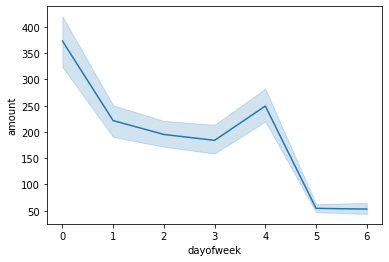

In [82]:
sns.lineplot(data=data, x="dayofweek", y='amount')

##### average of number of transaction for each month

In [84]:
data['count'] = 1
data['month'] = pd.to_datetime(data['date']).apply(lambda x: x.month)
data.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,country,customer_id,merchant_long_lat,movement,status_cat,txn_cat,gender_cat,dayofweek,count,month
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,Australia,CUS-2487424745,153.38 -27.99,debit,0,4,0,2,1,8
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,Australia,CUS-2487424745,151.21 -33.87,debit,0,5,0,2,1,8
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,Australia,CUS-2142601169,151.21 -33.87,debit,0,4,1,2,1,8
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,Australia,CUS-1614226872,153.05 -26.68,debit,0,5,0,2,1,8
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,Australia,CUS-2487424745,153.44 -28.06,debit,0,5,0,2,1,8


In [96]:
data.groupby('month')['amount'].describe()

,count,mean,std,min,25%,50%,75%,max
month,,,,,,,,
8,3943.0,185.121867,579.376003,1.52,15.455,28.13,51.425,8835.98
9,4013.0,182.045903,574.694422,0.10,16.090,29.00,54.400,8835.98
10,4087.0,196.427323,621.857821,0.10,16.390,29.00,55.000,8835.98


<AxesSubplot:xlabel='month', ylabel='amount'>

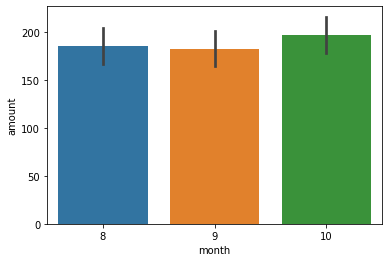

In [105]:
sns.barplot(data=data, x='month', y='amount')

##### according to time

In [108]:
data['hour'] = pd.to_datetime(data['extraction']).apply(lambda x: x.hour)
interested = ['extraction', 'hour']
data[interested]

,extraction,hour
0,2018-08-01T01:01:15.000+0000,1
1,2018-08-01T01:13:45.000+0000,1
2,2018-08-01T01:26:15.000+0000,1
3,2018-08-01T01:38:45.000+0000,1
4,2018-08-01T01:51:15.000+0000,1
...,...,...
12038,2018-10-31T23:09:06.000+0000,23
12039,2018-10-31T23:21:46.000+0000,23
12040,2018-10-31T23:34:25.000+0000,23
12041,2018-10-31T23:47:05.000+0000,23


In [109]:
data['hour'].unique()

array([ 1,  2,  4,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23,  0,  3,  5], dtype=int64)

In [114]:
data.groupby('hour')['amount'].mean()

hour
0      28.274907
1      48.716402
2      75.269764
3      84.725918
4      61.301845
5      64.524641
6      59.205261
7      72.927256
8      43.749159
9      42.301130
10     52.810130
11    315.735600
12    374.033591
13    665.238692
14    258.750225
15    233.858901
16    337.369244
17    587.677902
18     53.568407
19     54.528923
20     46.814900
21     44.511484
22     52.292445
23     50.653333
Name: amount, dtype: float64

<AxesSubplot:xlabel='hour', ylabel='amount'>

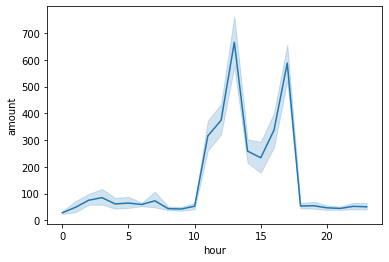

In [116]:
sns.lineplot(data=data, x='hour', y='amount')

In [131]:
data['age_group']='70s'
data['age_group'][data.age<70] = "60s"
data['age_group'][data.age<60] = "50s"
data['age_group'][data.age<50] = "40s"
data['age_group'][data.age<40] = "30s"
data['age_group'][data.age<30] = "20s"
data['age_group'][data.age<20] = "10s"
data.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,movement,status_cat,txn_cat,gender_cat,dayofweek,count,month,hour,age_group,age_group2
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,debit,0,4,0,2,1,8,1,20s,60s~70s
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,debit,0,5,0,2,1,8,1,20s,60s~70s
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,debit,0,4,1,2,1,8,1,30s,60s~70s
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,debit,0,5,0,2,1,8,1,40s,60s~70s
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,debit,0,5,0,2,1,8,1,20s,60s~70s


In [120]:
interested = ['age', 'age_group']
data[interested]

,age,age_group
0,26,20s
1,26,20s
2,38,30s
3,40,40s
4,26,20s
...,...,...
12038,30,30s
12039,20,20s
12040,28,20s
12041,69,60s


<AxesSubplot:xlabel='hour', ylabel='amount'>

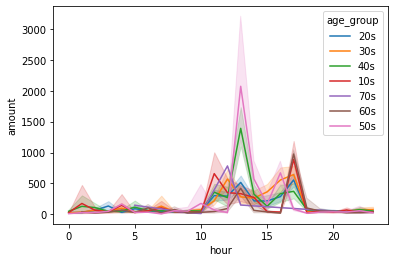

In [121]:
sns.lineplot(data=data, x='hour', y='amount', hue='age_group')

In [136]:
data['age_group2'] = "50s~70s"
data['age_group2'][data.age<50] = "20s~40s"
data['age_group2'][data.age<20] = "10s"
interested=['age_group','age_group2']
data[interested].head()

,age_group,age_group2
0,20s,20s~40s
1,20s,20s~40s
2,30s,20s~40s
3,40s,20s~40s
4,20s,20s~40s


<AxesSubplot:xlabel='hour', ylabel='amount'>

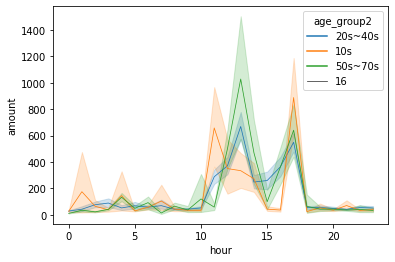

In [140]:
sns.lineplot(data=data, x='hour', y='amount', hue='age_group2', size=16)

In [153]:
df = data.groupby('hour').sum()
df

,card_present_flag,merchant_code,balance,age,amount,status_cat,txn_cat,gender_cat,dayofweek,count,month
hour,,,,,,,,,,,
0,91.0,0.0,1052468.39,3093,3053.69,0.0,490.0,51.0,379,108,952
1,165.0,0.0,2655525.89,6430,10425.31,0.0,957.0,127.0,720,214,1920
2,77.0,0.0,2454803.59,6441,15957.19,117.0,584.0,144.0,767,212,1919
3,34.0,0.0,3147717.47,5927,16606.28,153.0,387.0,125.0,604,196,1772
4,135.0,0.0,4402052.19,9290,18942.27,149.0,978.0,151.0,1028,309,2790
5,26.0,0.0,3986335.71,7169,13485.65,180.0,458.0,122.0,778,209,1884
6,43.0,0.0,3294447.07,7828,14742.11,191.0,533.0,129.0,729,249,2238
7,75.0,0.0,3461666.80,7792,19398.65,161.0,686.0,159.0,784,266,2396
8,338.0,0.0,12116284.43,17781,23930.79,131.0,2051.0,256.0,1590,547,4950


<AxesSubplot:xlabel='hour', ylabel='count'>

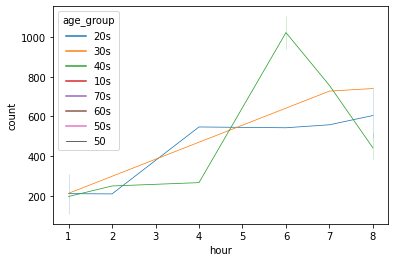

In [156]:
sns.lineplot(data=data, x='hour', y=df['count'], hue='age_group',)